#Required  libraries to install and import

####connect to google drive

In [11]:
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###installing required libraries

In [12]:
# Install necessary libraries
!pip install torch torchvision
!pip install -U 'git+https://github.com/facebookresearch/detectron2.git'
!pip install opencv-python-headless
!pip install pandas
!pip install scikit-learn
!pip install tensorflow

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-0xmr18gi
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-0xmr18gi
  Resolved https://github.com/facebookresearch/detectron2.git to commit e9f7e2ba15abd7badcb05ef6f5076f06b36a9c5b
  Preparing metadata (setup.py) ... done


###importing

In [13]:
import torch
import torchvision
import detectron2
import cv2
import pandas
import sklearn
import tensorflow as tf

print(f"Torch version: {torch.__version__}")
print(f"Torchvision version: {torchvision.__version__}")
print(f"Detectron2 version: {detectron2.__version__}")
print(f"OpenCV version: {cv2.__version__}")
print(f"Pandas version: {pandas.__version__}")
print(f"Scikit-learn version: {sklearn.__version__}")
print(f"TensorFlow version: {tf.__version__}")

Torch version: 2.1.0+cu121
Torchvision version: 0.16.0+cu121
Detectron2 version: 0.6
OpenCV version: 4.8.0
Pandas version: 1.5.3
Scikit-learn version: 1.2.2
TensorFlow version: 2.15.0


In [14]:
# General imports
import torch
from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from PIL import Image
import pandas as pd
import os
import numpy as np

import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split


#data splitting and preprocessing  

In [15]:
# !unzip /content/drive/MyDrive/major_project/data/archive_4_classes.zip
import shutil
import os

# Path to the zip file and the destination folder
zip_file_path = "/content/drive/MyDrive/major_project/data/archive_4_classes.zip"

destination_folder = '/content/full_data'

# Remove the 'full_data' folder if it exists
if os.path.exists(destination_folder):
    shutil.rmtree(destination_folder)

# Create the 'full_data' folder
os.makedirs(destination_folder)

# Unzip the file 'archive_4_classes.zip' into the 'full_data' folder
shutil.unpack_archive(zip_file_path, destination_folder)

###Splitting Data into train and testing

In [16]:
import os
import shutil
from sklearn.model_selection import train_test_split

data_dir = "/content/full_data"  # Replace this with your dataset directory
train_dir = "/content/new_datac4/train"  # Replace this with your desired train folder path
test_dir = "/content/new_datac4/test"  # Replace this with your desired test folder path

actions = os.listdir(data_dir)

# Create train and test directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

for action in actions:
    action_dir = os.path.join(data_dir, action)
    images = os.listdir(action_dir)

    # Split images into train and test
    train_images, test_images = train_test_split(images, test_size=0.1, random_state=42)

    # Create class directories in train and test folders
    train_action_dir = os.path.join(train_dir, action)
    test_action_dir = os.path.join(test_dir, action)
    os.makedirs(train_action_dir, exist_ok=True)
    os.makedirs(test_action_dir, exist_ok=True)

    # Copy images to respective train and test class directories
    for img in train_images:
        src_path = os.path.join(action_dir, img)
        dst_path = os.path.join(train_action_dir, img)
        shutil.copy(src_path, dst_path)

    for img in test_images:
        src_path = os.path.join(action_dir, img)
        dst_path = os.path.join(test_action_dir, img)
        shutil.copy(src_path, dst_path)

print("Dataset split into train and test folders based on classes.")


Dataset split into train and test folders based on classes.


###Data Generators

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define directories for train and validation data
train_data_dir = '/content/new_datac4/train'
validation_data_dir = '/content/new_datac4/test'

# Image dimensions and batch size
img_height, img_width = 224, 224
batch_size = 32

# Create ImageDataGenerators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    # Other augmentation parameters if needed
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Create train and validation generators
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 4320 images belonging to 4 classes.
Found 480 images belonging to 4 classes.


In [20]:
sample_images, sample_labels = next(train_generator)

# Displaying the first image in the sample
plt.imshow(sample_images[6])
plt.title(f"Sample Image from Class: {list(train_generator.class_indices.keys())[np.argmax(sample_labels[6])]}")
plt.axis('off')
plt.show()

NameError: ignored

V2-Model building ,Training,Testing, with outside data(from google,or real time)



#Model building tran and test

###CNN model

we are not going to train because it takes lot of time i have already trained and stored in  drive

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

num_classes = 4
# Create a Sequential model
model = Sequential()

# Convolutional layers
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(img_height, img_width, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

# Dense layers
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))

# Output layer
model.add(Dense(num_classes, activation='softmax'))  # num_classes is the number of classes in your dataset

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                   

###Model Training

In [22]:
# from tensorflow.keras.callbacks import ModelCheckpoint

# # Define the path where you want to save the model
# model_save_path = '/content'

# # Define a ModelCheckpoint callback to save the model with the lowest validation loss
# checkpoint = ModelCheckpoint(model_save_path, monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# # Train the model while using the ModelCheckpoint callback
# history = model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.samples // batch_size,
#     epochs=10,
#     validation_data=validation_generator,
#     validation_steps=validation_generator.samples // batch_size,
#     callbacks=[checkpoint]  # Pass the ModelCheckpoint callback here
# )

In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the path where you want to save the model
#model_save_path = '/content'

# Define a ModelCheckpoint callback to save the model with the lowest validation loss
#checkpoint = ModelCheckpoint(model_save_path, monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Train the model while using the ModelCheckpoint callback
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size#,
    #callbacks=[checkpoint]  # Pass the ModelCheckpoint callback here
)

Epoch 1/10
135/135 [==============================] - 58s 276ms/step - loss: 0.8018 - accuracy: 0.6905 - val_loss: 0.4443 - val_accuracy: 0.8583
Epoch 2/10
135/135 [==============================] - 37s 275ms/step - loss: 0.2819 - accuracy: 0.9053 - val_loss: 0.3709 - val_accuracy: 0.8875
Epoch 3/10
135/135 [==============================] - 38s 281ms/step - loss: 0.1491 - accuracy: 0.9516 - val_loss: 0.3670 - val_accuracy: 0.8875
Epoch 4/10
135/135 [==============================] - 38s 279ms/step - loss: 0.0725 - accuracy: 0.9778 - val_loss: 0.4604 - val_accuracy: 0.9062
Epoch 5/10
135/135 [==============================] - 38s 282ms/step - loss: 0.0537 - accuracy: 0.9808 - val_loss: 0.5299 - val_accuracy: 0.8958
Epoch 6/10
135/135 [==============================] - 38s 279ms/step - loss: 0.0538 - accuracy: 0.9819 - val_loss: 0.5081 - val_accuracy: 0.9083
Epoch 7/10
135/135 [==============================] - 38s 277ms/step - loss: 0.0324 - accuracy: 0.9917 - val_loss: 0.6775 - val_ac

In [24]:
import pandas as pd

# Convert the history dictionary to a DataFrame
history_df = pd.DataFrame(history.history)

# Save the history to a CSV file
csv_file_path = '/content/drive/MyDrive/major_project/data/history.csv'
history_df.to_csv(csv_file_path, index=False)

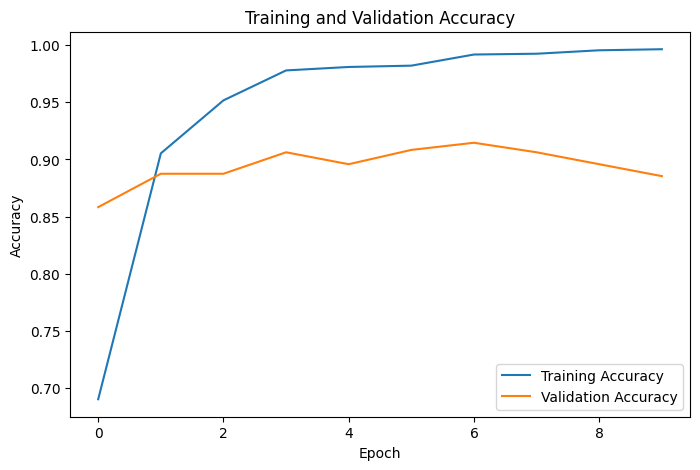

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the history from the CSV file
csv_file_path = '/content/drive/MyDrive/major_project/data/history.csv'
loaded_history = pd.read_csv(csv_file_path)

# Visualize training and validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(loaded_history['accuracy'], label='Training Accuracy')
plt.plot(loaded_history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

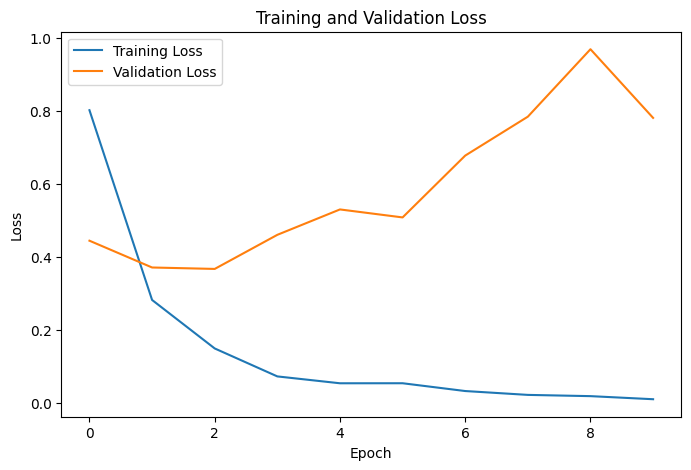

In [26]:
# Visualize training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(loaded_history['loss'], label='Training Loss')
plt.plot(loaded_history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

### Evaluate the trained model

###saving the model to drive

In [ ]:
# Assuming 'model' is your trained VGG-like model
model.save('/content/drive/MyDrive/major_project/modelsV1.0/model_c4_acc92_29_V1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


###loading the saved model from drive

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('/content/drive/MyDrive/major_project/modelsV1.0/model_c4_acc92_29_.h5')

In [ ]:
from tensorflow.keras.models import load_model

# # Load the best saved model
# best_model_path = 'path/to/save/best_model.h5'
# loaded_model = load_model(best_model_path)

# Evaluate the model on the validation set
val_loss, val_accuracy = loaded_model.evaluate(validation_generator)

print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')


15/15 [==============================] - 10s 105ms/step - loss: 0.4348 - accuracy: 0.9229
Validation Accuracy: 92.29%


###testing a sample other than test dataset (from google silhouette images)

1/1 [==============================] - 0s 19ms/step
index  2
Predicted class name: sitting


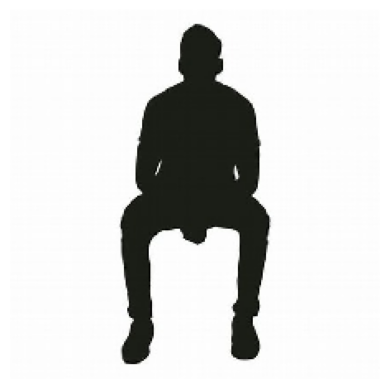

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
classes_list = ["bending","laying","sitting","standing"]
# Load and preprocess the silhouette image
silhouette_path = '/content/drive/MyDrive/major_project/data/sittingjpg.jpg'  # Replace with your silhouette image path
silhouette = image.load_img(silhouette_path, target_size=(img_height, img_width))
silhouette_array = image.img_to_array(silhouette)
silhouette_array = np.expand_dims(silhouette_array, axis=0)
silhouette_array = silhouette_array / 255.0  # Normalize

# Predict the class using the loaded model
predictions = loaded_model.predict(silhouette_array)

# Get the predicted class index
predicted_class_index = np.argmax(predictions, axis=1)[0]
# Assuming you have classes_list containing the class names
predicted_class_name = classes_list[predicted_class_index]
print("index ",predicted_class_index )
print(f"Predicted class name: {predicted_class_name}")
# Load and display the image
#img = mpimg.imread(image_path)
plt.imshow(silhouette)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

In [ ]:
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


###classify image from imported img

1/1 [==============================] - 0s 19ms/step
index  3
Predicted class name: standing


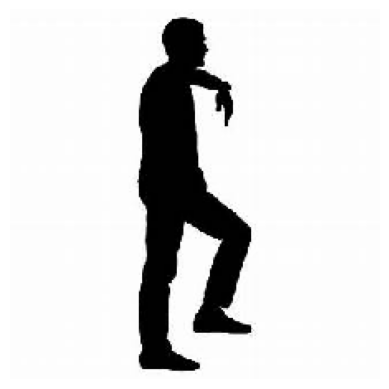

In [ ]:
from tensorflow.keras.preprocessing import image
img_height, img_width = 224, 224
classes_list = ["bending","laying","sitting","standing"]

# Load and preprocess the silhouette image
silhouette_path = '/content/drive/MyDrive/major_project/data/standing3.jpg'  # Replace with your silhouette image path
silhouette = image.load_img(silhouette_path, target_size=(img_height, img_width))
silhouette_array = image.img_to_array(silhouette)
silhouette_array = np.expand_dims(silhouette_array, axis=0)
silhouette_array = silhouette_array / 255.0  # Normalize

# Predict the class using the loaded model
predictions = loaded_model.predict(silhouette_array)

# Get the predicted class index
predicted_class_index = np.argmax(predictions, axis=1)[0]
# Assuming you have classes_list containing the class names
predicted_class_name = classes_list[predicted_class_index]
print("index ",predicted_class_index )
print(f"Predicted class name: {predicted_class_name}")
plt.imshow(silhouette)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

### Classify img from URL-laying

1/1 [==============================] - 0s 28ms/step
index  1
Predicted class name: laying


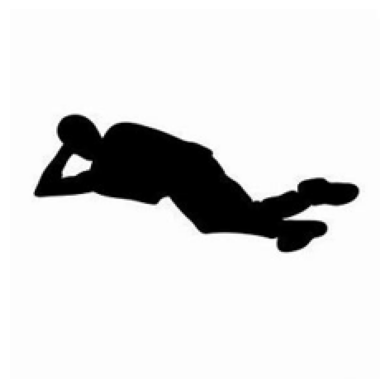

Probability of bending: 0.0001611820948710374
Probability of laying: 99.99983310699463
Probability of sitting: 3.413966354059994e-06
Probability of standing: 1.2570404786527156e-09


In [ ]:
import requests
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing import image
from io import BytesIO
# URL of the image
image_url = 'https://th.bing.com/th/id/OIP.PRd5At23GJwC5_TpqW3qtQAAAA?w=167&h=180&c=7&r=0&o=5&dpr=1.7&pid=1.7'  # Replace this with your image URL

# Download the image from the URL
response = requests.get(image_url)
image_data = response.content

# Load and preprocess the image
silhouette = Image.open(BytesIO(image_data))  # Ensure you've imported BytesIO: from io import BytesIO
silhouette = silhouette.resize((img_height, img_width))
silhouette_array = image.img_to_array(silhouette)
silhouette_array = np.expand_dims(silhouette_array, axis=0)
silhouette_array = silhouette_array / 255.0  # Normalize

# Predict the class using the loaded model
predictions = loaded_model.predict(silhouette_array)

# Get the predicted class index
predicted_class_index = np.argmax(predictions, axis=1)[0]
# Assuming you have classes_list containing the class names
predicted_class_name = classes_list[predicted_class_index]
print("index ",predicted_class_index )
print(f"Predicted class name: {predicted_class_name}")

predicted_class_probabilities = predictions[0]  # Assuming you have a single prediction

plt.imshow(silhouette)
plt.axis('off')  # Hide axis
plt.show()

for i, label in enumerate(classes_list):
    probability = predicted_class_probabilities[i]
    print(f"Probability of {label}: {probability*100}")

#Classify img from detectron2

# V1- person key points recognition in the image

### installing detectron2

already imported

In [6]:
# !pip install -U 'git+https://github.com/facebookresearch/detectron2.git'

###importing the necessary libraries

In [ ]:
import torch
from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from PIL import Image
import pandas as pd
import os
import numpy as np

###importing the detectron2 model with respective weights

In [ ]:
# Set up Detectron2 config
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # Set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")

###if Environment working on CPU uncomment below line

In [ ]:
#cfg.MODEL.DEVICE = "cpu"  # Set device to CPU

###Detecton predictor intialization



In [ ]:
# Create predictor
predictor = DefaultPredictor(cfg)

model_final_a6e10b.pkl: 237MB [00:01, 208MB/s]                           


###extract key points from image an example

i will show you how to capture image and do silhouette image

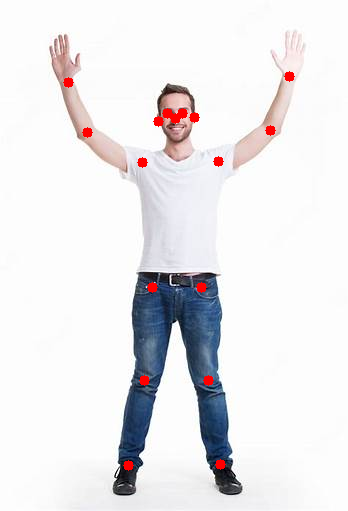

In [ ]:
import cv2

# Create predictor
predictor = DefaultPredictor(cfg)
# Load image
image = Image.open("/content/drive/MyDrive/major_project/data/standing_c-3.jpg")  # Update with the path to your image
#image = Image.open("/content/photo.jpg")
# Convert image to numpy array
image_array = np.array(image)

# Perform inference
outputs = predictor(image_array)

# Extract keypoints
keypoints = outputs['instances'].pred_keypoints[0].cpu().numpy()  # Keypoints for the first detected person

# Keypoints are in the format [x, y, confidence], reshape them to [x, y] coordinates
keypoints_xy = keypoints[:, :2]

# Display keypoints (for illustration purposes)
for point in keypoints_xy:
    x, y = point
    cv2.circle(image_array, (int(x), int(y)), 5, (255, 0, 0), -1)  # Draw a circle at each keypoint location

# Display or save the image with keypoints
Image.fromarray(image_array)

###It explains how i draw black mask on the image using key points

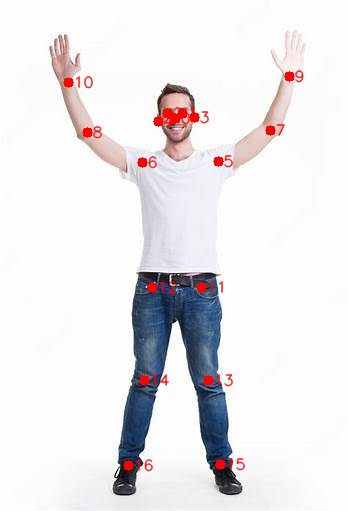

In [ ]:
# Display keypoints with index numbers
for idx, point in enumerate(keypoints_xy):
    x, y = int(point[0]), int(point[1])
    #cv2.circle(image_array, (x, y), 5, (0, 0, 0), -1)  # Draw a black circle at each keypoint location
    cv2.putText(image_array, str(idx), (x + 5, y + 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1,
                cv2.LINE_AA)  # Print index in red color

# Display the image with keypoints and index numbers
Image.fromarray(image_array)

###Draw silhouette image using keypoints

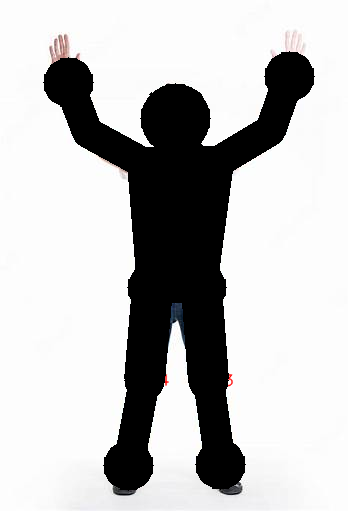

In [ ]:
import cv2

white_img = np.ones_like(image_array) * 255
def draw_on_img(keypoints_xy,image_array):
    # Create a white image
    white_img = np.ones_like(image_array) * 255
    # Display keypoints (for illustration purposes)
    for i,point in enumerate(keypoints_xy):
        x, y = point
        if i==0:
            cv2.circle(image_array, (int(x), int(y)), 5, (0, 0, 0), 60)  # Draw a circle at head
        elif i in [3,4]:
            continue  #not required
        elif i in [9,10,15,16]:
            cv2.circle(image_array, (int(x), int(y)), 5, (0, 0, 0), 40)  # Draw a circle at edges
        elif i in [11,12]:
            cv2.circle(image_array, (int(x), int(y)), 5, (0, 0, 0), 40)  # Draw a circle at edges
        else:
            cv2.circle(image_array, (int(x), int(y)), 5, (0, 0, 0), 5)  # Draw a circle at each keypoint location

    #body
    rectangle_points = np.array([keypoints_xy[5], keypoints_xy[6], keypoints_xy[12],keypoints_xy[11]], np.int32)
    cv2.fillPoly(image_array, [rectangle_points], (0, 0, 0))  # Draw a filled rectangle


    #lines
    lines = [#[2,5],[1,6],#sholder
            [5,7],[7,9],[6,8],[8,10],#hands
            [5,6],[6,12],[12,11],[11,5],#body
            [12,14],[14,16],[11,13],[13,15]#legs
            ]
    for i,point in enumerate(lines):
        if i in [8,10]:
            p = 40
        else:
            p = 30
        cv2.line(image_array, tuple(keypoints_xy[point[0]].astype(int)), tuple(keypoints_xy[point[1]].astype(int)), (0, 0, 0), p)  # Draw a line from point 2 to point 3


    #head
    # Define vertices of the triangle
    vertices = np.array([keypoints_xy[0], keypoints_xy[5], keypoints_xy[6]], np.int32)


    # Fill the triangle with black color
    cv2.fillPoly(image_array, [vertices], (0, 0, 0))
    return image_array

# Display or save the image with keypoints
Image.fromarray(draw_on_img(keypoints_xy,image_array))

####image on a blank page

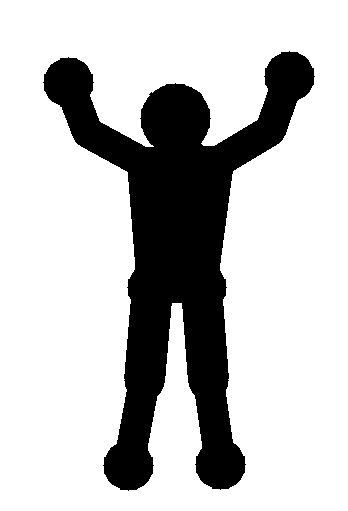

In [ ]:
silhouette_img = draw_on_img(keypoints_xy,white_img)
Image.fromarray(silhouette_img)

##classifying the image

In [ ]:
# from google.colab import drive

# # Mount your Google Drive
# drive.mount('/content/drive')

1/1 [==============================] - 0s 27ms/step
index  3
Predicted class name: standing


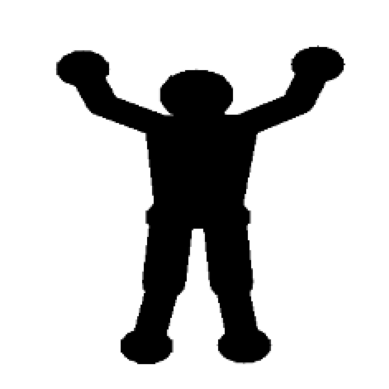

Probability of bending: 29.095572233200073
Probability of laying: 5.65934032201767
Probability of sitting: 9.413185715675354
Probability of standing: 55.83190321922302


In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
img_height, img_width = 224, 224
classes_list = ["bending","laying","sitting","standing"]

# # Load and preprocess the silhouette image
silhouette = silhouette_img #                                                                # this image got from above detectron2
silhouette = cv2.resize(silhouette, (img_height, img_width))
#silhouette = silhouette.reshape(img_height, img_width)
silhouette_array = image.img_to_array(silhouette)
silhouette_array = np.expand_dims(silhouette_array, axis=0)
silhouette_array = silhouette_array / 255.0  # Normalize

# Predict the class using the loaded model
predictions = loaded_model.predict(silhouette_array)

# Get the predicted class index
predicted_class_index = np.argmax(predictions, axis=1)[0]
# Assuming you have classes_list containing the class names
predicted_class_name = classes_list[predicted_class_index]
print("index ",predicted_class_index )
print(f"Predicted class name: {predicted_class_name}")
predicted_class_probabilities = predictions[0]  # Assuming you have a single prediction

plt.imshow(silhouette)
plt.axis('off')  # Hide axis
plt.show()

for i, label in enumerate(classes_list):
    probability = predicted_class_probabilities[i]
    print(f"Probability of {label}: {probability*100}")

#capture image from webcam

In [ ]:
!pip install opencv-python-headless

In [ ]:

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=1):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

#capture image through colab and do predictions

In [ ]:
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


###detectron model

In [ ]:
!pip install -U 'git+https://github.com/facebookresearch/detectron2.git'
import torch
from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from PIL import Image
import pandas as pd
import os
import numpy as np

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-4rz4ds40
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-4rz4ds40
  Resolved https://github.com/facebookresearch/detectron2.git to commit e9f7e2ba15abd7badcb05ef6f5076f06b36a9c5b
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for detectron2: filename=detectron2-0.6-cp310-cp310-linux_x86_64.whl size=5739938 sha256=ea6b3e17274573a5329584c0007050

In [ ]:
# Set up Detectron2 config
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # Set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")

#cfg.MODEL.DEVICE = "cpu"  # Set device to CPU
# Create predictor
predictor = DefaultPredictor(cfg)

model_final_a6e10b.pkl: 237MB [00:01, 177MB/s]                           


In [ ]:
import numpy as np
def process_image_with_detectron(image):
    #image = Image.open("/content/photo.jpg")
    # Convert image to numpy array
    #image_array = np.array(image)
    # Perform inference
    outputs = predictor(image)

    # Extract keypoints
    try:
        keypoints = outputs['instances'].pred_keypoints[0].cpu().numpy()  # Keypoints for the first detected person
         # Keypoints are in the format [x, y, confidence], reshape them to [x, y] coordinates
        keypoints_xy = keypoints[:, :2]
        # Check if any element in any array is zero
        has_zero = (keypoints_xy == 0).any()
        c = 0
        if has_zero:
            print("Image is not accurate.... but i will try preidicting possible class please wait but not 100 % accurate")
    except:
        keypoints_xy = 0
        c = 1
    return c,keypoints_xy

In [ ]:
def draw_on_img(keypoints_xy,image_array):
    white_img = np.ones_like(image_array) * 255
    # Display keypoints (for illustration purposes)
    for i,point in enumerate(keypoints_xy):
        x, y = point
        if i==0:
            cv2.circle(image_array, (int(x), int(y)), 5, (0, 0, 0), 80)  # Draw a circle at head
        elif i in [3,4]:
            continue  #not required
        elif i in [9,10,15,16]:
            cv2.circle(image_array, (int(x), int(y)), 5, (0, 0, 0), 50)  # Draw a circle at edges
        elif i in [11,12]:
            cv2.circle(image_array, (int(x), int(y)), 5, (0, 0, 0), 70)  # Draw a circle at edges
        else:
            cv2.circle(image_array, (int(x), int(y)), 5, (0, 0, 0), 5)  # Draw a circle at each keypoint location

    #body
    rectangle_points = np.array([keypoints_xy[5], keypoints_xy[6], keypoints_xy[12],keypoints_xy[11]], np.int32)
    cv2.fillPoly(image_array, [rectangle_points], (0, 0, 0))  # Draw a filled rectangle
    #lines
    lines = [#[2,5],[1,6],#sholder
            [5,7],[7,9],[6,8],[8,10],#hands
            [5,6],[6,12],[12,11],[11,5],#body
            [12,14],[14,16],[11,13],[13,15]#legs
            ]
    for i,point in enumerate(lines):
        if i in [8,10]:
            p = 60
        else:
            p = 40
        cv2.line(image_array, tuple(keypoints_xy[point[0]].astype(int)), tuple(keypoints_xy[point[1]].astype(int)), (0, 0, 0), p)  # Draw a line from point 2 to point 3

    #head
    # Define vertices of the triangle
    vertices = np.array([keypoints_xy[0], keypoints_xy[5], keypoints_xy[6]], np.int32)

    # Fill the triangle with black color
    cv2.fillPoly(image_array, [vertices], (0, 0, 0))
    return image_array

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the pretrained model
loaded_model = load_model('/content/drive/MyDrive/major_project/modelsV1.0/model_c4_acc92_29_.h5')

# Classes list
classes_list = ["bending", "laying", "sitting", "standing"]

In [ ]:
!pip install opencv-python js

In [ ]:
def take_photo(filename='photo.jpg', quality=1):
    js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // uncomment to put a button to take the picture
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

def load_and_predict_class(model, img):
    img_height, img_width = 224, 224
    # Process image using Detectron for keypoints
    i,keypoints_xy = process_image_with_detectron(img)
    if i :
        predictions = 0
        return 1,predictions
    # Draw silhouette based on keypoints
    silhouette_img = draw_on_img(keypoints_xy, img)
    silhouette = silhouette_img
    silhouette = cv2.resize(silhouette, (img_height, img_width))
    silhouette_array = np.expand_dims(silhouette, axis=0)
    silhouette_array = silhouette_array / 255.0  # Normalize
    predictions = loaded_model.predict(silhouette_array,verbose=False)
    return 0,predictions

Probability of bending: 0.9247228503227234
Probability of laying: 0.5113597959280014
Probability of sitting: 3.743666037917137
Probability of standing: 94.82024908065796


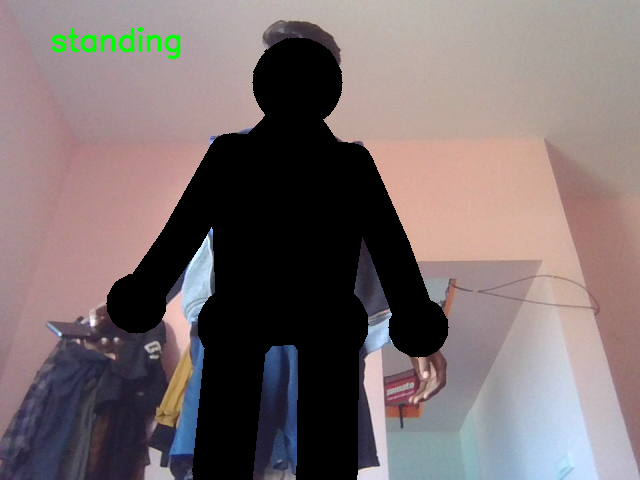

please click the below button to capture image


<IPython.core.display.Javascript object>

KeyboardInterrupt: ignored

In [ ]:
from google.colab.patches import cv2_imshow
import time
from IPython.display import display, clear_output
import base64
start_time = time.time()
text = "Predicting....."
time.sleep(3)
def annotate_live_video():
    font = cv2.FONT_HERSHEY_SIMPLEX
    org = (50, 50)
    fontScale = 1
    color1 = (0, 0, 255)
    color2 = (0, 255, 0)
    thickness = 2
    c = 0
    while c<5:
        c +=4
        #time.sleep(2)
        # clear_output(wait=True)
        print("please click the below button to capture image")
        # # Use img_array for further processing
        filename = take_photo()
        image_array = cv2.imread(filename)
        annotated_image = cv2.putText(image_array.copy(), text, org, font, fontScale, color1, thickness, cv2.LINE_AA)
        clear_output(wait=True)
        print("image: ",c," remaining : ",5-c)
        cv2_imshow(annotated_image)
        #predicted_class_name = load_and_predict_class(loaded_model, image_array)
        i,predictions = load_and_predict_class(loaded_model, image_array)
        if i == 1:
            txt1 = "can't find a person in the image.. please try infront of a person.."
            annotated_image = cv2.putText(image_array.copy(), txt1, org, font, fontScale, color2, thickness, cv2.LINE_AA)
            clear_output(wait=True)
            cv2_imshow(annotated_image)
            continue
        predicted_class_index = np.argmax(predictions, axis=1)[0]
        predicted_class_name = classes_list[predicted_class_index]
        # Annotate the predicted class on the image
        annotated_image = cv2.putText(image_array.copy(), predicted_class_name, org, font, fontScale, color2, thickness, cv2.LINE_AA)
        clear_output(wait=True)
        for i, label in enumerate(classes_list):
            probability = predictions[0][i]
            print(f"Probability of {label}: {probability * 100}")
        cv2_imshow(annotated_image)
        #time.sleep(10)
        # Break the loop on pressing 'q'
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cv2.destroyAllWindows()

# Run the function to start live video annotation
annotate_live_video()

#streamlit web page

##install and authenticate **ngrok**

In [ ]:
!pip install pyngrok

In [ ]:
!ngrok authtoken 2aDqbcmAdDQHdJTgYSUnUsGjrUs_3DXhTKWGsizNhoYU1mm6Y

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 7.0.0
    Uninstalling importlib-metadata-7.0.0:
      Successfully uninstalled importlib-metadata-7.0.0


##StreamLit-webpage

In [ ]:
from google.colab import drive

# #Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# # Install necessary packages
!pip install -U 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-seume9ll
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-seume9ll
  Resolved https://github.com/facebookresearch/detectron2.git to commit e9f7e2ba15abd7badcb05ef6f5076f06b36a9c5b
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for detectron2: filename=detectron2-0.6-cp310-cp310-linux_x86_64.whl size=5739952 sha256=7cef84e5f30052938363638a0660

In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np
import cv2
from PIL import Image
from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor

from IPython.display import display, Javascript
#from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the pretrained model
loaded_model = load_model('/content/drive/MyDrive/major_project/modelsV1.0/model_c4_acc92_29_.h5')


# Set up Detectron2 config
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # Set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.DEVICE = "cpu"  # Set device to CPU
predictor = DefaultPredictor(cfg)



def process_image_with_detectron(image):
    outputs = predictor(image)
    try:
        keypoints = outputs['instances'].pred_keypoints[0].cpu().numpy()
        keypoints_xy = keypoints[:, :2]
        has_zero = (keypoints_xy == 0).any()
        if has_zero:
            print("Image might not be accurate; attempting to predict the possible class.")
    except:
        keypoints_xy = 0
    return keypoints_xy

def draw_on_img(keypoints_xy, image_array):
    white_img = np.ones_like(image_array) * 255
    image_array = white_img
    # Display keypoints (for illustration purposes)
    for i, point in enumerate(keypoints_xy):
        x, y = point
        if i == 0:
            cv2.circle(image_array, (int(x), int(y)), 5, (0, 0, 0), 50)  # Draw a circle at head
        elif i in [3, 4]:
            continue  # not required
        elif i in [9, 10, 15, 16]:
            cv2.circle(image_array, (int(x), int(y)), 5, (0, 0, 0), 30)  # Draw a circle at edges
        elif i in [11, 12]:
            cv2.circle(image_array, (int(x), int(y)), 5, (0, 0, 0), 40)  # Draw a circle at edges
        else:
            cv2.circle(image_array, (int(x), int(y)), 5, (0, 0, 0), 20)  # Draw a circle at each keypoint location

    # body
    rectangle_points = np.array([keypoints_xy[5], keypoints_xy[6], keypoints_xy[12], keypoints_xy[11]], np.int32)
    cv2.fillPoly(image_array, [rectangle_points], (0, 0, 0))  # Draw a filled rectangle
    # lines
    lines = [
        [5, 7], [7, 9], [6, 8], [8, 10],  # hands
        [5, 6], [6, 12], [12, 11], [11, 5],  # body
        [12, 14], [14, 16], [11, 13], [13, 15]  # legs
    ]
    for i, point in enumerate(lines):
        if i in [8, 10]:
            p = 30
        else:
            p = 20
        cv2.line(image_array, tuple(keypoints_xy[point[0]].astype(int)), tuple(keypoints_xy[point[1]].astype(int)),
                 (0, 0, 0), p)  # Draw a line from point 2 to point 3

    # head
    # Define vertices of the triangle
    vertices = np.array([keypoints_xy[0], keypoints_xy[5], keypoints_xy[6]], np.int32)

    # Fill the triangle with black color
    cv2.fillPoly(image_array, [vertices], (0, 0, 0))
    return image_array

def load_and_predict_class(model, img):
    img_height, img_width = 224, 224
    #img = cv2.resize(img, (img_height, img_width))
    keypoints_xy = process_image_with_detectron(img)
    if isinstance(keypoints_xy, int):
        predictions = 0
        return 1, predictions,img
    silhouette_img = draw_on_img(keypoints_xy, img)
    with st.spinner('Processing image...'):
        container2 = st.container(border=True)
        container2.image(silhouette_img, caption='Silhouette Image', use_column_width=True, clamp=True)
    silhouette = silhouette_img
    silhouette = cv2.resize(silhouette, (img_height, img_width))
    silhouette_array = np.expand_dims(silhouette, axis=0)
    silhouette_array = silhouette_array / 255.0  # Normalize
    predictions = model.predict(silhouette_array, verbose=False)
    return 0, predictions,silhouette_img


# import streamlit as st
# import numpy as np
# import cv2
# from PIL import Image
# from detectron2 import model_zoo
# from detectron2.config import get_cfg
# from detectron2.engine import DefaultPredictor

# ... (existing code remains the same)
def display_prediction_results(predictions,i):
    predicted = 1
def main():
    predicted = None
    st.set_page_config(layout="wide")
    col_height = 500
    col1, col2,col3 = st.columns([2, 2,1])
    image = None
    img_array = None
    uploaded_file =None
    with col1:
        st.title('Human Action Recognition')

        #option = st.radio('', ('Upload Image', 'Capture Image'))

        #if option == 'Upload Image':

        st.write('Press the capture button to take a picture')
        img_array = st.camera_input("")
        if img_array is not None:
            uploaded_file = None
            st.subheader("Analyzing....")
            #st.image(img_array, caption='Silhouette Image', use_column_width=True)
            bytes_data = img_array.getvalue()
            image = cv2.imdecode(np.frombuffer(bytes_data, np.uint8), cv2.IMREAD_COLOR)
        st.subheader("Or Upload an image. here")
        uploaded_file = st.file_uploader('Upload an image', type=['jpg', 'jpeg', 'png'])
        if uploaded_file is not None:
            img_array = None
            st.subheader("Analyzing....")
            image = Image.open(uploaded_file)
            #st.image(image, caption='Silhouette Image', use_column_width=True)
            image = np.array(image)
    with col2:
        container2 = st.container(border=True)
        # container.write("This is inside the container")
        # st.write("This is outside the container")
        #col1_col2, col2_col2 = st.columns(2)
        if image is not None:
            #with col1_col2:
            st.subheader('Captured and Predicted Images')
            if img_array is not None:
                classes_list = ["bending", "laying", "sitting","standing"]
                with st.spinner('Processing image...'):
                    container1 = st.container(border=True)
                    container1.image(img_array, caption='Uploaded Image', use_column_width=True, clamp=True)
            else:
                classes_list = [ "standing", "laying", "sitting","bending"]
                with st.spinner('Processing image...'):
                    container1 = st.container(border=True)
                    container1.image(image, caption='Uploaded Image', use_column_width=True, clamp=True)
            #with col2_col2:
            st.write("Accuracy may vary based on image quality")
            i, predictions, imgg = load_and_predict_class(loaded_model, image)
            #st.image(imgg, caption='Silhouette Image', use_column_width=True)
            display_prediction_results(predictions,i)
            predicted = 1
    with col3:
        if predicted:
            with st.spinner('Processing image...'):
                st.subheader('Predictions:')
                if i == 1:
                    st.write("Can't find a person in the image. Please try in front of a person.")
                else:
                    predicted_class_index = np.argmax(predictions)
                    predicted_class_name = classes_list[predicted_class_index]
                    st.markdown(f"**Predicted Action:** <font color='red' size='{10}'>{predicted_class_name}</font>", unsafe_allow_html=True)
                    for i, label in enumerate(classes_list):
                        probability = predictions[0][i]
                        st.write(f"Probability of {label}: {probability * 100:.2f}%")
    # Applying fixed height to the columns
    st.markdown(
        f"""
        <style>
        #columns_with_fixed_heights {{
            height: {col_height}px !important;
            overflow: auto;
        }}
        </style>
        """,
        unsafe_allow_html=True
    )
def display_prediction_results(predictions,i):
    predicted = 1

if __name__ == "__main__":
    main()









# st.title('Human Action Recognition')

# # Buttons for uploading an image or capturing an image
# option = st.selectbox('Select an option:', ('Upload Image', 'Capture Image'))

# if option == 'Upload Image':
#     uploaded_file = st.file_uploader('Upload an image', type=['jpg', 'jpeg', 'png'])
#     if uploaded_file is not None:
#         # Read the uploaded file as PIL Image
#         image = Image.open(uploaded_file)
#         st.image(image, caption='Uploaded Image', use_column_width=True)
#         img_array = np.array(image)
#         # Preprocess the image if needed before prediction
#         # Make predictions using your loaded model
#         st.subheader("Predicting....")
#         st.subheader("i am not 100% accurate ....accuracy depends on image quality")
#         i, predictions,imgg = load_and_predict_class(loaded_model, img_array)
#         #st.image(imgg, caption='silhouette Image', use_column_width=True)
#         # Display the prediction results
#         st.subheader('Predictions:')
#         if i == 1:
#             st.subheader("Can't find a person in the image. Please try in front of a person.")
#         else:
#             predicted_class_index = np.argmax(predictions)
#             predicted_class_name = classes_list[predicted_class_index]
#             st.subheader(f"Predicted Action: {predicted_class_name}")
#             for i, label in enumerate(classes_list):
#                 probability = predictions[0][i]
#                 st.write(f"Probability of {label}: {probability * 100:.2f}%")

# elif option == 'Capture Image':
#     # Button to trigger image capture
#     #if st.button('Capture Input Image'):
#     st.write('Press the capture button to take a picture')
#     # Capture an image using camera_input
#     img_array = st.camera_input("Take a picture")
#     # Check if an image is captured
#     if img_array is not None:
#         st.subheader("Predicting....")
#         st.subheader("i am not 100% accurate ....accuracy depends on image quality")
#         bytes_data = img_array.getvalue()
#         cv2_img = cv2.imdecode(np.frombuffer(bytes_data, np.uint8), cv2.IMREAD_COLOR)
#         # Process the captured image with your function
#         i, predictions,imgg = load_and_predict_class(loaded_model, cv2_img)
#         #st.image(imgg, caption='silhouette Image', use_column_width=True)
#         # Display the prediction results
#         st.subheader('Predictions:')
#         if i == 1:
#             st.write("Can't find a person in the image. Please try in front of a person.")
#         else:
#             predicted_class_index = np.argmax(predictions)
#             predicted_class_name = classes_list[predicted_class_index]
#             st.subheader(f"Predicted Action: {predicted_class_name}")
#             for i, label in enumerate(classes_list):
#                 probability = predictions[0][i]
#                 st.write(f"Probability of {label}: {probability * 100:.2f}%")


Writing app.py


In [ ]:
! pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.7 MB/s eta 0:00:00


In [ ]:
!wget -q -o - ipv4.icanhazip.com

In [ ]:
!streamlit run /content/app.py & npx localtunnel --port 8501
from pyngrok import ngrok
public_url = ngrok.connect(port='8501')
public_url




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.90.138.222:8501

npx: installed 22 in 6.294s
your url is: https://eight-donuts-wave.loca.lt
  Stopping...
^C


ModuleNotFoundError: ignored

In [ ]:
#after completion of stream it run the below code
#!ngrok.kill()
!pkill streamlit